# Aim

Our goal is to predict the vehicle price using the open source Auto data set from the UCI machine learning repository. In this data set, we have prices for 205 automobiles, along with other features such as fuel type, engine type,engine size,etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import model_selection, feature_selection, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,OrdinalEncoder
from matplotlib import pyplot
from sklearn.linear_model import Ridge , Lasso,RidgeCV 
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_goldfeldquandt
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer , make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_regression, SelectKBest,f_regression,RFE

# About Dataset

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

# Attributes:

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

# Loading Data

1. The dataset csv doesn't have the header. We pass column names explicitly. The header information is available at:

https://archive.ics.uci.edu/ml/datasets/Automobile

2. We see '?' in the dataframe which can be replaced with NaN value while loading itself

In [2]:
df = pd.read_csv("imports-85.data",header=None,names=["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"],na_values='?')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
df.shape

(205, 26)

# Handling Missing values

**Below is the columnwise missing value count.**

In [4]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

As we can see from above, here are the 7 columns containing missing values:

"normalized-losses": 41, "num-of-doors": 2, "bore": 4, "stroke" : 4, "horsepower": 2, "peak-rpm": 2, "price": 4

### Categorical Imputation: Replace by mode

"num-of-doors": 2 missing values, replace them with "four".

**Reason: Since 'four' doors is the most frequent value in this column as shown below, it is the most likely value to occur**

In [5]:
df["num-of-doors"].mode()[0] #df["num-of-doors"].value_counts().idxmax() is also fine

'four'

In [6]:
#replace the missing values by the most frequent value
df["num-of-doors"].fillna(df["num-of-doors"].mode()[0], inplace=True)

### Numerical Imputation: Replace by mean

"normalized-losses": 41 missing values, replace them with mean

"stroke": 4 missing values, replace them with mean

"bore": 4 missing values, replace them with mean

"horsepower": 2 missing values, replace them with mean

"peak-rpm": 2 missing values, replace them with mean

In [7]:
#Replace the missing values by mean value of respective columns
df["normalized-losses"].fillna(df["normalized-losses"].astype("float").mean(), inplace=True)

df["bore"].fillna(df["bore"].astype("float").mean(), inplace=True)

df["stroke"].fillna(df["stroke"].astype("float").mean(), inplace = True)

df["peak-rpm"].fillna(df["peak-rpm"].astype("float").mean(), inplace = True)

df['horsepower'].fillna(df['horsepower'].astype("float").mean(), inplace=True)

### Dropping the records

"price": 4 missing values, delete the entire 4 records

**Reason: As price is what we will predict. So records with missing price will no longer be useful for our modeling purpose**

In [8]:
#Drop entire row "price" column is missing
df.dropna(subset=["price"], axis=0, inplace=True)

In [9]:
# reset index as we dropped 2 rows
df.reset_index(drop=True, inplace=True)

In [10]:
# re-checking missing after handling them
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Checking data types

In [11]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

**Numerical variables should have type 'float' or 'int' whereas variables with strings should have type 'object'. So, we convert below columns to proper data types**

In [12]:
df[["bore", "stroke","price","peak-rpm"]] = df[["bore", "stroke","price","peak-rpm"]].astype("float")
df[["normalized-losses","horsepower"]] = df[["normalized-losses","horsepower"]].astype("int")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

# Data Visualization

## Numerical Variables 

In [14]:
df_numeric = df[["symboling","normalized-losses","wheel-base", "length","width",
          "height","curb-weight", "engine-size","horsepower","bore","stroke","compression-ratio",
         "peak-rpm","city-mpg","highway-mpg","price"]]

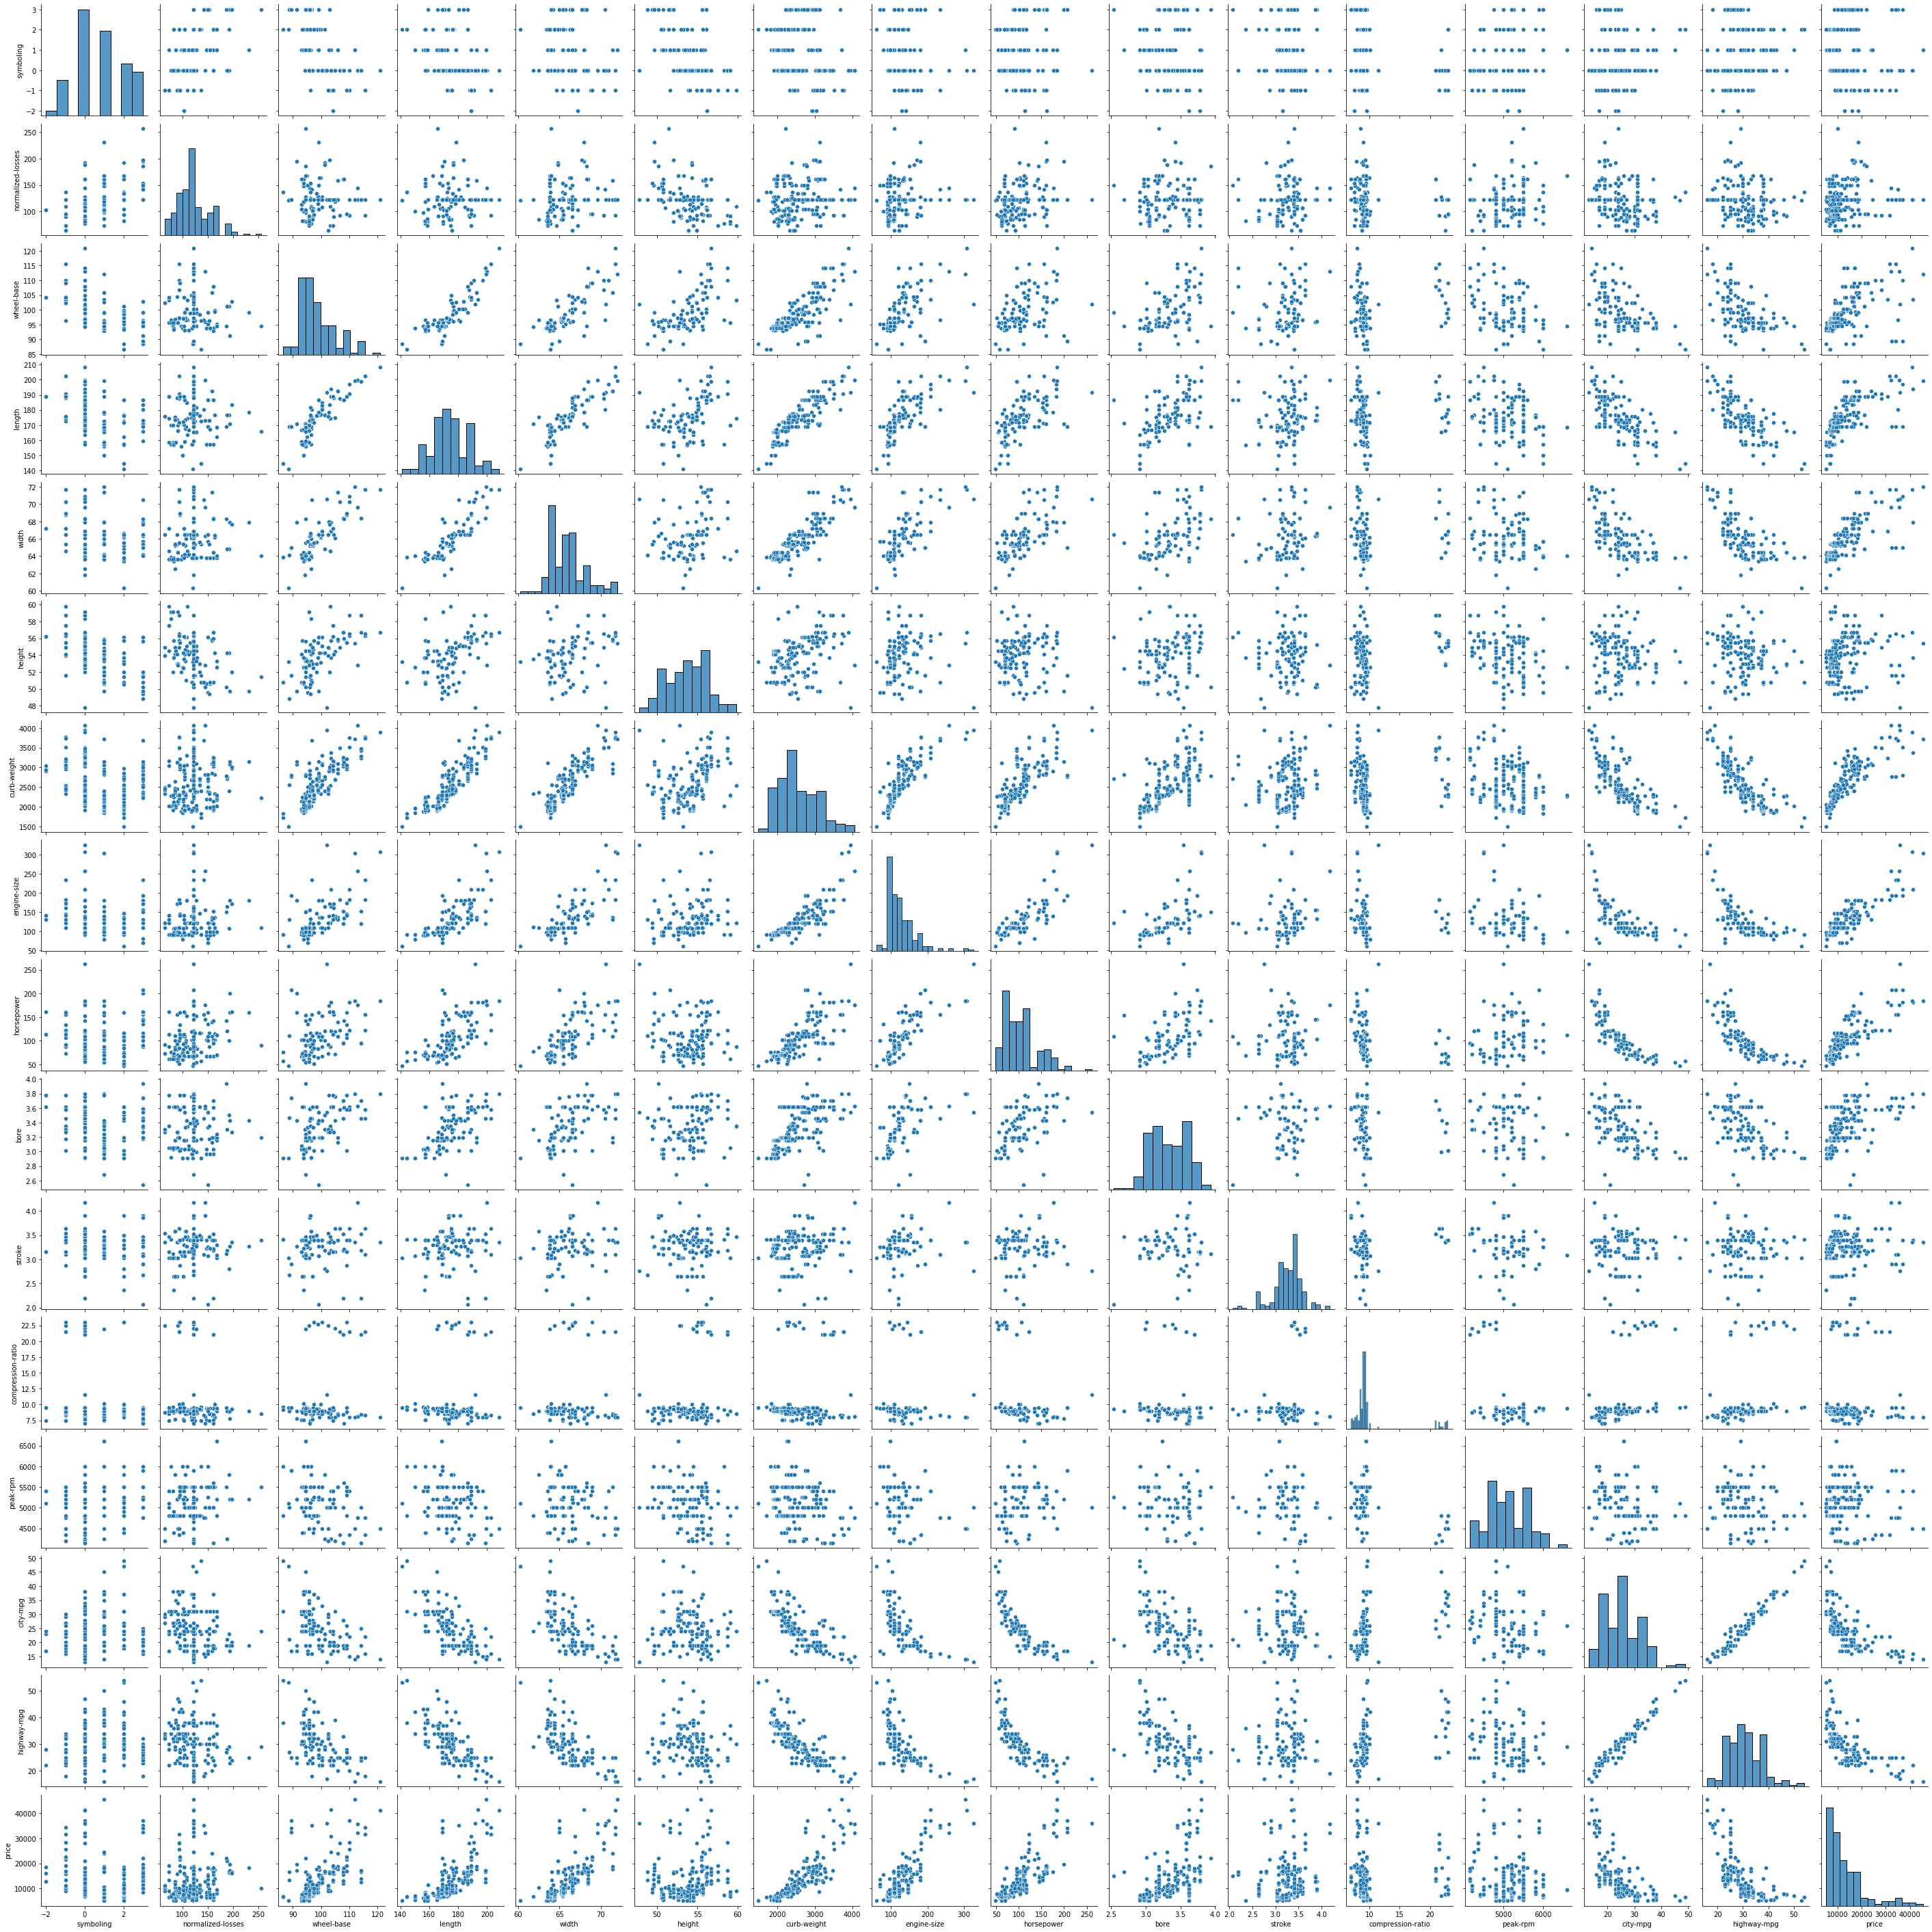

In [15]:
sns.pairplot(df_numeric)

Difficult to understand anything from above due to too many features, so we try to see correlation and plot a heatmap

In [16]:
df_numeric.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,horsepower,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,0.075810,-0.140019,-0.008153,-0.182196,0.279740,-0.035527,0.036233,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,0.217300,-0.029862,0.055045,-0.114713,0.239543,-0.225016,-0.181877,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.371178,0.493244,0.158018,0.250313,-0.360305,-0.470606,-0.543304,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.579795,0.608971,0.123952,0.159733,-0.285970,-0.665192,-0.698142,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.615056,0.544885,0.188822,0.189867,-0.245800,-0.633531,-0.680635,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,-0.087001,0.180449,-0.060663,0.259737,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.757981,0.644060,0.167438,0.156433,-0.279361,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.822668,0.572609,0.205928,0.028889,-0.256733,-0.650546,-0.679571,0.872335
horsepower,0.075810,0.217300,0.371178,0.579795,0.615056,-0.087001,0.757981,0.822668,1.000000,0.566903,0.098128,-0.214489,0.107884,-0.822192,-0.804579,0.809607
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,0.566903,1.000000,-0.055390,0.001263,-0.267392,-0.582027,-0.591309,0.543155


<AxesSubplot:>

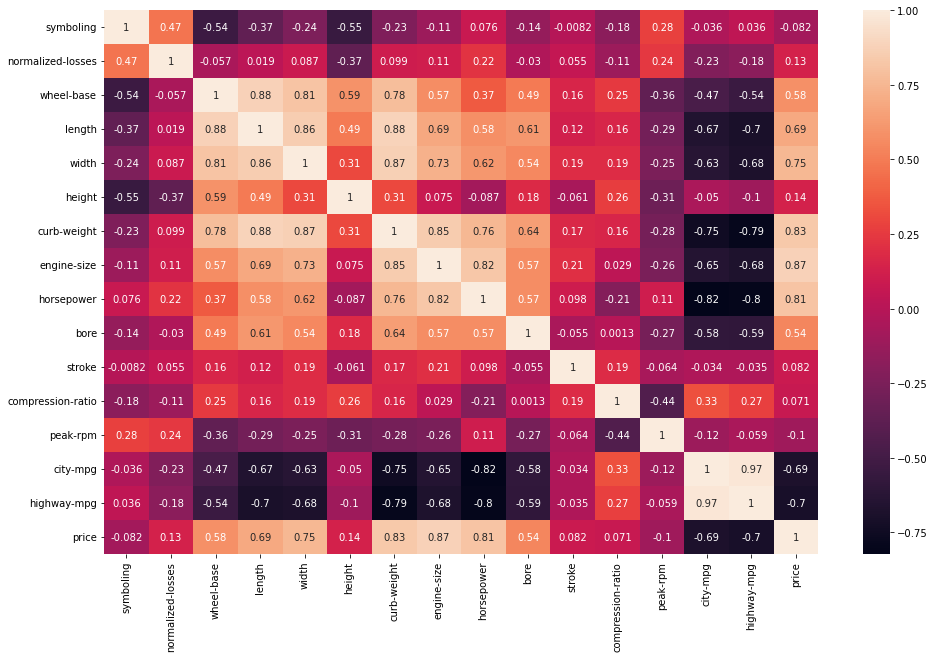

In [17]:
plt.figure(figsize=(16,10))
sns.heatmap(df_numeric.corr(),annot=True)

we can see from above heatmap that how wheel-base, length, width, curb-weight, engine-size, bore, horsepower are highly correlated with price whereas peak-rpm, city-mpg, highway-mpg are negatively correlated with price.

There is also a high correlation among the independent variables which leads to Multicollinearity issue. This may need to be handled.

## Categorical Variables

In [18]:
df_obj = df.select_dtypes(include=['object']).copy()
df_obj.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


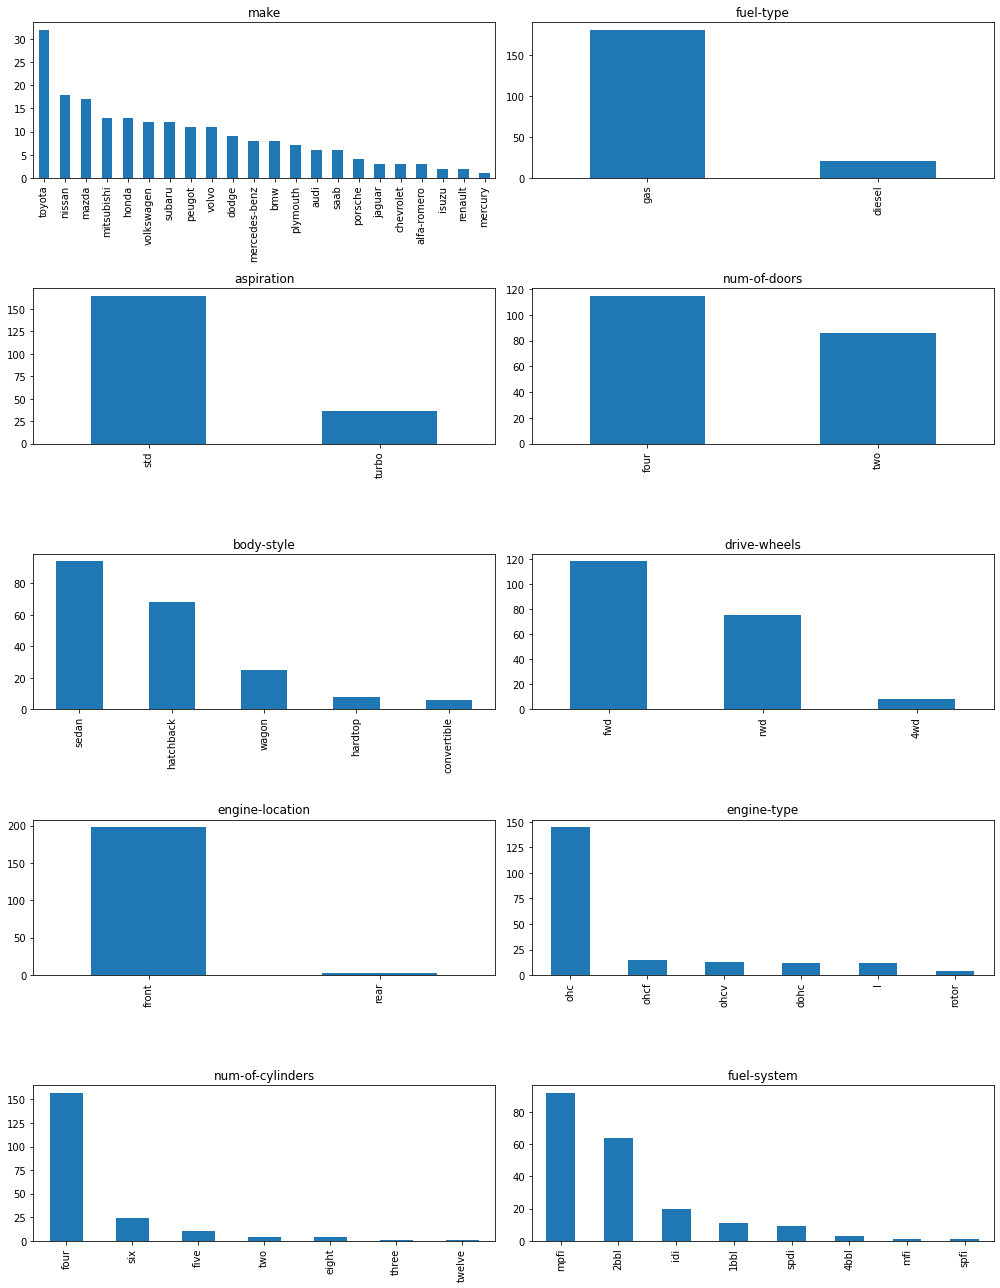

In [19]:
category = ["make","fuel-type","aspiration","num-of-doors","body-style",
         "drive-wheels","engine-location","engine-type","num-of-cylinders","fuel-system"]
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 18))
axe = axes.ravel()
for i, category in enumerate(df_obj[category]):
    df_obj[category].value_counts().plot(kind="bar", ax=axe[i]).set_title(category)
fig.show()
fig.tight_layout()

## Analyzing Individual Feature Patterns using Visualization

<code>How to choose the right visualization method?</code><br>
When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.
</div>

In [20]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


<b>Numerical variables:</b>

<p>Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type <code>int64</code> or <code>float64</code>. A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.</p>
</div>

### engine-size vs price

correlation between engine-size and price:


,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


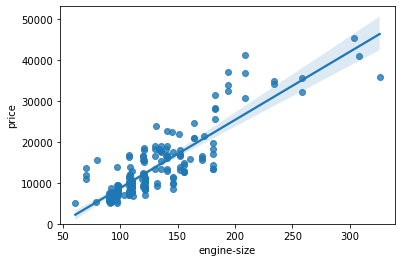

In [21]:
sns.regplot(x = 'engine-size', y = 'price', data = df)
plt.ylim(0,) # y axis starts from zero
print("correlation between engine-size and price:")
df[["engine-size", "price"]].corr()

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.We can examine the correlation between engine-size and price and see it's approximately 0.87

we can calculate the correlation between variables of type int64 or float64 using the method corr: The diagonal elements are always one


### highway-mpg vs price 

Highway mpg is a potential predictor variable of price
Highway MPG: the average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed. City MPG: the score a car will get on average in city conditions, with stopping and starting at lower speeds.



correlation between highway-mpg and price:


,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


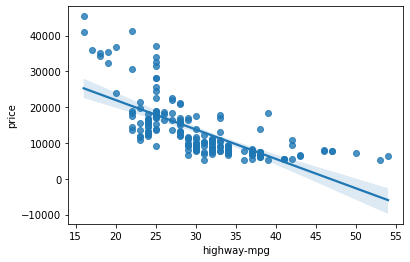

In [22]:
sns.regplot(x = 'highway-mpg', y = 'price',data = df)
print('correlation between highway-mpg and price:')
df[['highway-mpg', 'price']].corr()

As the `highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship` between these two variables. Highway mpg could potentially be a predictor of price.We can examine the correlation between highway-mpg and price and see it's approximately `-0.704`

### peak-rpm vs price

correlation between peak-rpm and price:


,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


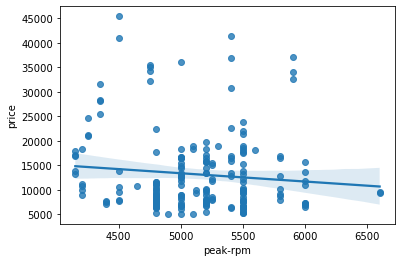

In [23]:
sns.regplot(x = 'peak-rpm', y = 'price', data = df)
print('correlation between peak-rpm and price:')
df[['peak-rpm','price']].corr()

`Peak rpm does not seem like a good predictor of the price at all` since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.We can examine the `correlation` between peak-rp and price and see it's approximately `-0.101616`

### stroke vs price

correlation between stroke and prce :


,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


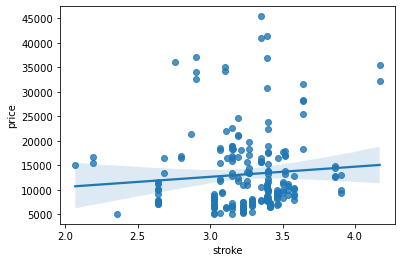

In [24]:
print('correlation between stroke and prce :')

# correlation results between "price" and "stroke" do you expect a linear relationship?
sns.regplot(x = 'stroke', y = 'price', data = df)

# correlation between x="stroke", y="price".
df[['stroke','price']].corr()

`Stroke does not seem like a good predictor of the price at all` since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.We can examine the `correlation` between stroke and price and see it's approximately `0.08`

<b>Categorical variables</b>
<p>These are variables that describe a <code>characteristic</code> of a data unit, and are selected from a small group of categories. The categorical variables can have the type <code>object</code> or <code>int64</code>. A good way to visualize categorical variables is by using boxplots.
</div>

# Split the train and test dataset into X and y

In [25]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [26]:
X=df.iloc[:,:-1] # Feature matrix
y=df.iloc[:,-1]  # Target vector

# Checking the Linear Regression Assumptions

**As we are going to apply encoding on categorical features, the categorical features will have linear properties. That is why we are checking LR Assumptions for the numerical features.**

In [27]:
X_numeric = df_numeric.iloc[:,:-1]

In [28]:
## Feature Scaling Using Standard Scaler Method
stdscaler=StandardScaler()
numeric_features = ["symboling","normalized-losses","wheel-base", "length","width",
          "height","curb-weight", "engine-size","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg"]
num_transformed=stdscaler.fit_transform(X_numeric)
num_transformed=pd.DataFrame(num_transformed, columns=numeric_features)
num_transformed.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.203823,0.520966,-1.829833,-0.291435,-0.246718,-0.652249,-0.542288
1,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.203823,0.520966,-1.829833,-0.291435,-0.246718,-0.652249,-0.542288
2,0.127193,0.000000,-0.710103,-0.244152,-0.185597,-0.559713,0.518080,0.606234,1.357486,-2.433363,0.676031,-0.291435,-0.246718,-0.964397,-0.689386
3,0.926121,1.315931,0.165748,0.195176,0.148335,0.218425,-0.423766,-0.431327,-0.037641,-0.526138,0.453993,-0.041121,0.801670,-0.184027,-0.100993
4,0.926121,1.315931,0.099646,0.195176,0.243744,0.218425,0.520017,0.220165,0.311141,-0.526138,0.453993,-0.541748,0.801670,-1.120471,-1.277779


In [29]:
# Fitting the model for the linear dataset
lr_model = LinearRegression()
lr_model.fit(num_transformed, y)

# Returning the R^2 for the model
r2 = lr_model.score(num_transformed, y)
print('R^2: {0}'.format(r2))

R^2: 0.8503207594067356


### Test for Linearity
This assumes that there is a linear relationship between the predictors (e.g. independent variables or features) and the response variable (e.g. dependent variable or label). <br>
- Linear regression would not be a fitting estimator if there is no linear relationship between the features and the targets

In [30]:
# Creates predictions on the features with the model and calculates residuals
def residual(model,feature,label):
    pred=model.predict(feature)
    df2=pd.DataFrame({"Actual":label,"Predicted":pred})
    df2["Residuals"]=df2["Actual"]-df2["Predicted"]
    return df2

In [31]:
def linear_assumption(model, features, label):
    print('Linearity Check:', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = residual(model, features, label)
    
    # print(df_results)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7)
    # sns.residplot(x="Actual", y="Predicted", data=df_results)    
    # Plotting the diagonal line
    # line_coords = np.arange(df_results.min().min(), df_results.max().max())
    line_coords = np.arange(df_results.iloc[:,0:2].min().min(), df_results.iloc[:,0:2].max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

In [32]:
residual(lr_model, num_transformed, y)

,Actual,Predicted,Residuals
0,13495.0,12973.675320,521.324680
1,16500.0,12973.675320,3526.324680
2,16500.0,17991.241462,-1491.241462
3,13950.0,11817.286908,2132.713092
4,17450.0,15800.098459,1649.901541
...,...,...,...
196,16845.0,18203.661321,-1358.661321
197,19045.0,20292.957785,-1247.957785
198,21485.0,24287.909001,-2802.909001
199,22470.0,20119.276419,2350.723581


Linearity Check: 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


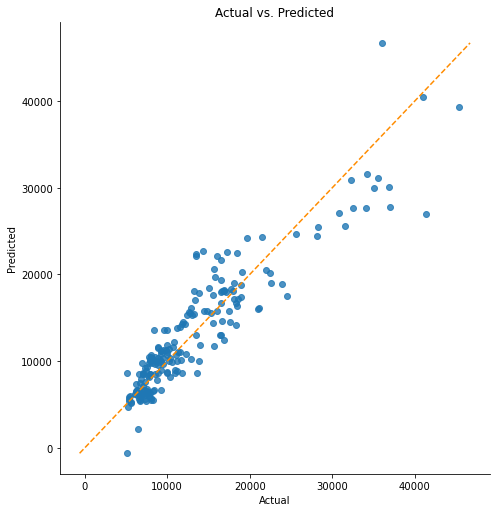

In [33]:
linear_assumption(lr_model, num_transformed, y)

Observation: <br>
- Almost linear, but have some outliers

### Test for Normality
Assumes that the error terms are normally distributed. If they are not, nonlinear transformations of variables may solve this.
- This assumption being violated primarily causes issues with the confidence intervals
- More specifically, this assumes that the error terms of the model are normally distributed. 

<b>It can happen:</b> 
- If either the predictors or the label are significantly non-normal 
- Linearity assumption being violated or 
- Outliers affecting our model
<br>


<b>Perform Anderson-Darling test</b>

In [34]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    
    print('Normality Check:', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = residual(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]

    print('p-value less than 0.05, non-normal')
    print('p-value more than 0.05, normal')
    print('p-value is: ', p_value)
    
    # Plotting the residuals distribution
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Normally distributed')
    else:
        print('Not Normally distributed')

Normality Check: 

Using the Anderson-Darling test for normal distribution
p-value less than 0.05, non-normal
p-value more than 0.05, normal
p-value is:  0.00031332369656355495


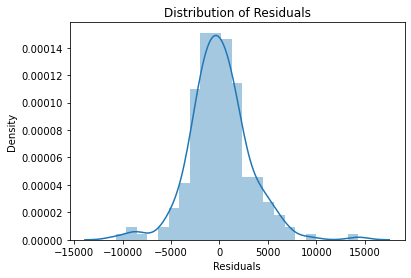


Not Normally distributed


In [35]:
normal_errors_assumption(lr_model, num_transformed, y)

### Test for Multicolinearity
This assumes that the predictors used in the regression are not correlated with each other. 
<br><br>
<b>How to solve it: </b>
- This can be fixed by other removing predictors with a high variance inflation factor (VIF) 
- Performing dimensionality reduction

In [36]:
def multicollinearity(X,y,name=None):
    plt.figure(figsize=(16,10))
    sns.heatmap(pd.DataFrame(X,columns=name).corr(),annot=True)
    VIF=[variance_inflation_factor(X,idx) for idx in range(X.shape[1])]
    for i, j in enumerate(VIF):
        print(f"{name[i]}----->{j}")
    print(f"cases of Multicollinearity---->{sum(map(lambda x: x>10,VIF))}")

symboling----->2.2810712141555896
normalized-losses----->1.6475845954662345
wheel-base----->8.946059409661173
length----->9.687778309252693
width----->5.980483230780937
height----->2.5374240109459145
curb-weight----->16.247000237667727
engine-size----->7.189792325334926
bore----->9.008318992037868
stroke----->2.1221521748087695
compression-ratio----->1.1983037470764588
horsepower----->2.223037176430511
peak-rpm----->2.104044595614892
city-mpg----->27.584616370493244
highway-mpg----->25.266105740779008
cases of Multicollinearity---->3


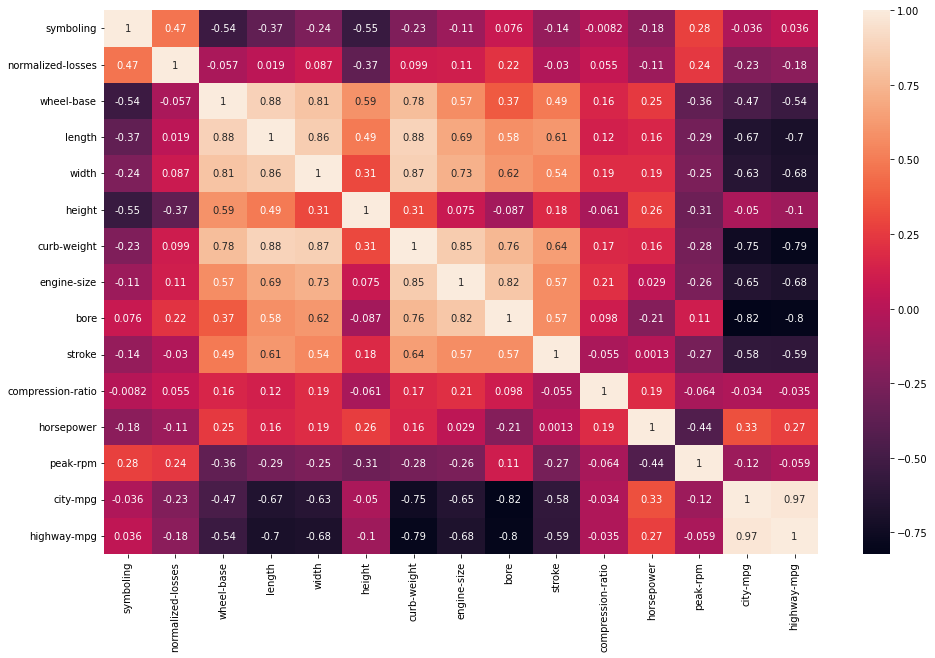

In [37]:
multicollinearity(num_transformed, y, numeric_features)

**For 3 features, multicolinearity exists, and they are: curb-weight, city-mpg and highway-mpg**

#### Checking multicolinearity by removing features

In [38]:
## Checking multicolinearity again by removing city-mpg
numeric_features2 = ["symboling","normalized-losses","wheel-base", "length","width",
          "height","curb-weight", "engine-size","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","highway-mpg"]

num_transformed2 = num_transformed[numeric_features2]
num_transformed2.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg
0,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.203823,0.520966,-1.829833,-0.291435,-0.246718,-0.542288
1,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.203823,0.520966,-1.829833,-0.291435,-0.246718,-0.542288
2,0.127193,0.000000,-0.710103,-0.244152,-0.185597,-0.559713,0.518080,0.606234,1.357486,-2.433363,0.676031,-0.291435,-0.246718,-0.689386
3,0.926121,1.315931,0.165748,0.195176,0.148335,0.218425,-0.423766,-0.431327,-0.037641,-0.526138,0.453993,-0.041121,0.801670,-0.100993
4,0.926121,1.315931,0.099646,0.195176,0.243744,0.218425,0.520017,0.220165,0.311141,-0.526138,0.453993,-0.541748,0.801670,-1.277779


symboling----->2.249781946185974
normalized-losses----->1.6323195661193637
wheel-base----->8.732797184546467
length----->8.839013052151351
width----->5.974533481539332
height----->2.537419883457294
curb-weight----->16.237175448859574
engine-size----->6.955457452472555
bore----->8.429342520309902
stroke----->2.1060413812783434
compression-ratio----->1.1855151210532795
horsepower----->2.0861691193200573
peak-rpm----->2.1040268902514954
highway-mpg----->6.197871264649549
cases of Multicollinearity---->1


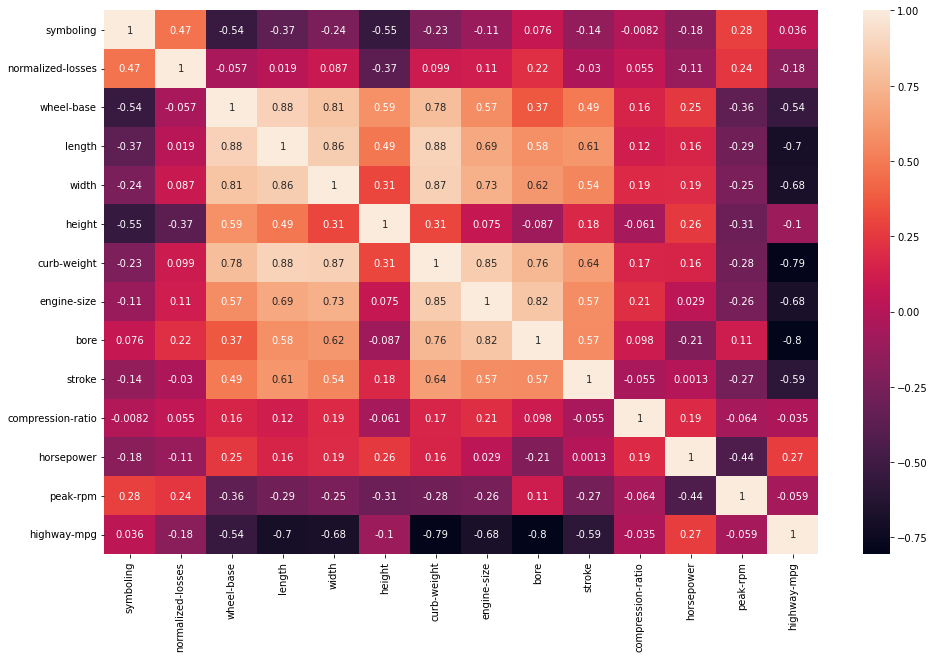

In [39]:
lr_model2 = LinearRegression()
lr_model2.fit(num_transformed2, y)
multicollinearity(num_transformed2, y, numeric_features2)

**Now we have cases of multicolinearity is 1, we can try to check again by removing this coulmn**

In [40]:
## Checking multicolinearity again by removing curb-weight
numeric_features3 = ["symboling","normalized-losses","wheel-base", "length","width",
          "height", "engine-size","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","highway-mpg"]

num_transformed3 = num_transformed[numeric_features3]
num_transformed3.head()

,symboling,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg
0,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,0.075389,0.203823,0.520966,-1.829833,-0.291435,-0.246718,-0.542288
1,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,0.075389,0.203823,0.520966,-1.829833,-0.291435,-0.246718,-0.542288
2,0.127193,0.000000,-0.710103,-0.244152,-0.185597,-0.559713,0.606234,1.357486,-2.433363,0.676031,-0.291435,-0.246718,-0.689386
3,0.926121,1.315931,0.165748,0.195176,0.148335,0.218425,-0.431327,-0.037641,-0.526138,0.453993,-0.041121,0.801670,-0.100993
4,0.926121,1.315931,0.099646,0.195176,0.243744,0.218425,0.220165,0.311141,-0.526138,0.453993,-0.541748,0.801670,-1.277779


symboling----->2.2475110551241575
normalized-losses----->1.6136522207573722
wheel-base----->8.559258097370288
length----->8.280988981145851
width----->5.8501499080493184
height----->2.5089219615531118
engine-size----->6.14650177813929
bore----->7.91239177563372
stroke----->2.1042164898344917
compression-ratio----->1.1847819294636948
horsepower----->1.7137406485280573
peak-rpm----->2.0276099969409502
highway-mpg----->4.909646963051663
cases of Multicollinearity---->0


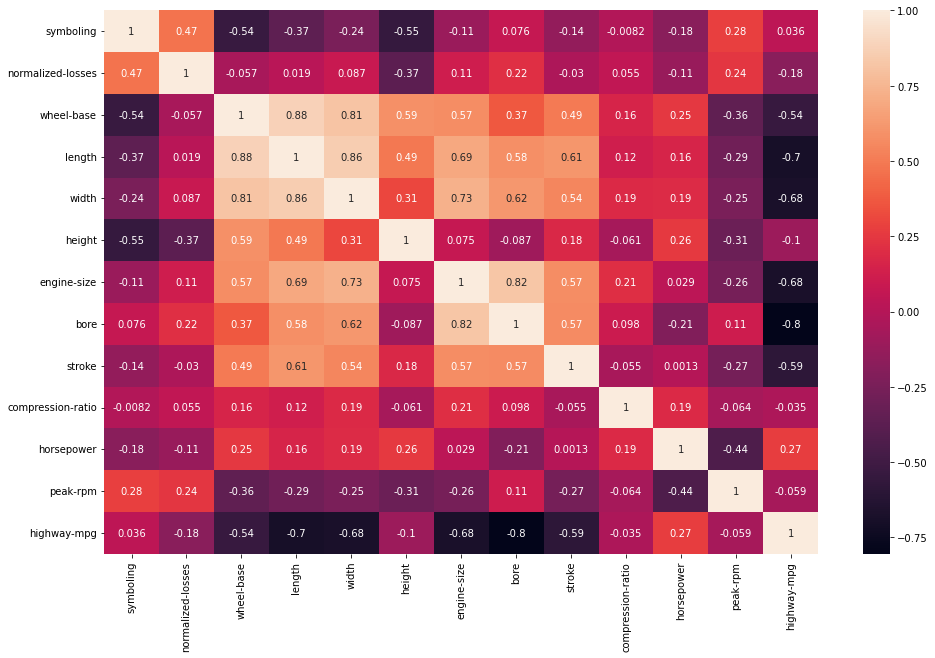

In [41]:
lr_model3 = LinearRegression()
lr_model3.fit(num_transformed3, y)
multicollinearity(num_transformed3, y, numeric_features3)

**Yeee, we dont have any multicolinearity problem now in the dataset**

### Test for Homoscedasticity

This assumes homoscedasticity, which is the same variance within the error terms. 
Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms.<br>

<b>What it will affect: </b>
- Significance tests for coefficients due to the standard errors being biased. 
- Additionally, the confidence intervals will be either too wide or too narrow.<br>

<b>The Goldfeld-Quandt test</b> uses the following null and alternative hypotheses:

<b>Null (H0): </b>Homoscedasticity is present.

<b>Alternative (HA): </b>Heteroscedasticity is present.

<b>How to fix this issue:</b>

1. Transform the response variable.

You can try performing a transformation on the response variable, such as taking the log, square root, or cube root of the response variable. Typically this can cause heteroscedasticity to go away.

2. Use weighted regression.

Weighted regression assigns a weight to each data point based on the variance of its fitted value. Essentially, this gives small weights to data points that have higher variances, which shrinks their squared residuals.

When the proper weights are used, weighted regression can eliminate the problem of heteroscedasticity.

In [42]:
f_val,p_val,ordering=het_goldfeldquandt(y, num_transformed3)
print(p_val)
if p_val>0.05:
    print("HO: Homoscedasticity is present ")
else:
    print("HA: Heteroscedasticity is present")

0.8286741673235369
HO: Homoscedasticity is present 


### Test for Autocorrelation
This assumes no autocorrelation of the error terms. Autocorrelation being present typically indicates that we are missing some information that should be captured by the model. <br>

<b>Why it can happen: </b>In a time series scenario, there could be information about the past that we aren’t capturing. In a non-time series scenario, our model could be systematically biased by either under or over predicting in certain conditions. Lastly, this could be a result of a violation of the linearity assumption.<br>

<b>How to detect it: </b>
- We will perform a Durbin-Watson test to determine if either positive or negative correlation is present.<br>

**Using Durbin-Watson test**

The test statistic always ranges from 0 to 4 where:

- 1.5 < d < 2.5 is no autocorrelation
- 1.5 < is positive autocorrelation
- <p>> 2.5 is negative autocorrelation </p>

In general, if d is less than 1.5 or greater than 2.5 then there is potentially a serious autocorrelation problem. Otherwise, if d is between 1.5 and 2.5 then autocorrelation is likely not a cause for concern.

In [43]:
def autocorrelation_assumption(model, features, label):
    from statsmodels.stats.stattools import durbin_watson
    print('Autocorrelation Check:', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = residual(model, features, label)

    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
    else:
        print('Little to no autocorrelation', '\n')

In [44]:
autocorrelation_assumption(lr_model3, num_transformed3, y)

Autocorrelation Check: 

Durbin-Watson: 0.8856084308589343
Signs of positive autocorrelation 



# Feature Engineering Pipeline: Feature Scaling and Encoding

In [45]:
## numeric_features = ["symboling","normalized-losses","wheel-base", "length","width",
##          "height","curb-weight", "engine-size","bore","stroke","compression-ratio","horsepower",
##         "peak-rpm","city-mpg","highway-mpg"]

numeric_features = ["symboling","normalized-losses","wheel-base", "length","width", 
                    "height", "engine-size","bore","stroke","compression-ratio","horsepower",
                    "peak-rpm","highway-mpg"]

df1 = df[numeric_features]

# print(df1.head())

## Feature Scaling
numeric_transformer = Pipeline(
    steps=[("std_scaling",StandardScaler())]
)

categorical_features = ["make", "fuel-type", "aspiration",'num-of-doors', 'body-style', 'drive-wheels', 'engine-location','engine-type',
       'num-of-cylinders','fuel-system']

df2 = df[categorical_features]
# print(df2.head())

## Categorical Feature Encoding
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(drop="first",handle_unknown='ignore'))]
)

df = pd.concat([df1, df2], axis=1)
df["price"] = df_numeric["price"]
# print(df.head())

print('Number of features before encoding = ',len(numeric_features)+len(categorical_features))

preprocess=ColumnTransformer(
    transformers=[ ("num", numeric_transformer, numeric_features),
                ("cat", categorical_transformer, categorical_features)
                  ],
    remainder="passthrough",
    n_jobs=-1,
    verbose=True
    )

X_transformed=preprocess.fit_transform(df.iloc[:,:-1])

print('Number of features after encoding = ',X_transformed.shape[1])

Number of features before encoding =  23
Number of features after encoding =  62


In [46]:
X_transformed=pd.DataFrame(X_transformed)
X_transformed.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,0.075389,0.520966,-1.829833,-0.291435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,0.075389,0.520966,-1.829833,-0.291435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.127193,0.000000,-0.710103,-0.244152,-0.185597,-0.559713,0.606234,-2.433363,0.676031,-0.291435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.926121,1.315931,0.165748,0.195176,0.148335,0.218425,-0.431327,-0.526138,0.453993,-0.041121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.926121,1.315931,0.099646,0.195176,0.243744,0.218425,0.220165,-0.526138,0.453993,-0.541748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X_transformed,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 62)
(41, 62)
(160,)
(41,)


# Feature Selection

Feature selection yields a subset of features from the original set of features, which are the best representatives of the data.

1. reduces overfitting ‘ The Curse of Dimensionality’ — If your dataset has more features/columns than samples (X), the model will be prone to overfitting. By removing irrelevant data/noise, the model gets to focus on essential features, leading to more generalization.


2. simplifies models — Dimensionality adds many layers to a model, making it needlessly complicated. Overengineering is fun but they may not be better than their simpler counterparts. Simpler models are easier to interpret and debug.


3. reduces training time — Lesser features/dimensions reduces the computation speed, speeding up model training.

## Model based Selection

* selection of the important features from the model weight

In [48]:
model_based=feature_selection.SelectFromModel(LinearRegression(),threshold="median")
df_selected=model_based.fit_transform(X_transformed,y)

In [49]:
df_selected.shape

(201, 31)

In [50]:
model_based.threshold_

2773.6671601380367

Int64Index([ 6, 13, 14, 15, 16, 18, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30, 34,
            37, 38, 39, 40, 43, 44, 46, 48, 49, 52, 53, 54, 57, 61],
           dtype='int64')


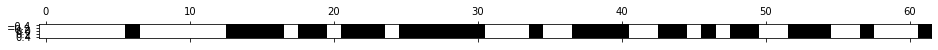

In [51]:
mask=model_based.get_support()
print(pd.DataFrame(preprocess.fit_transform(df)).columns[:-1][mask])
plt.matshow(mask.reshape(1,-1),cmap="gray_r")

In [52]:
pd.DataFrame([model_based.estimator_.coef_],columns=pd.DataFrame(preprocess.fit_transform(df)).columns[:-1])

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,-517.33132,-276.920917,1113.244924,-655.149575,1530.536838,-672.905639,4351.768921,-675.444994,-600.664578,-2610.042128,...,-3.472747e+16,-9706.436638,-5.020098e+15,2761.789239,216.539931,3.279235e+16,1071.247103,1632.906511,854.414269,4027.63883


## RFE

In [53]:
rfe = RFE(estimator = LinearRegression())  
rfe.fit(X_transformed,y)
X_selected = rfe.transform(X_transformed)
print(np.shape(X_selected))

(201, 31)


### Applying RFE to the training set

In [54]:
rfe = RFE(estimator = LinearRegression())  
rfe.fit(X_train,y_train)
X_train_selected = rfe.transform(X_train)

# mask = selector.get_support()    
# #print(selector.scores_)
# new_features5 = X_transformed.columns[mask]
# print(new_features5)

print(np.shape(X_train_selected))

(160, 31)


## select KBest

It returns the K important features based on mutual information technique or Anova or regression

### KBest mutual information technique

In [55]:
#select 31 features with k best mutual information technique
selector= SelectKBest(mutual_info_regression, k=31)
X_kbest31=selector.fit_transform(X_transformed,y)
mask = selector.get_support()    

#print(selector.scores_)
new_features1 = X_transformed.columns[mask]
print(new_features1)   
print(X_kbest31.shape)  # 31 features

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 21, 25, 31,
            34, 35, 38, 41, 42, 44, 45, 47, 49, 50, 51, 55, 57, 59],
           dtype='int64')
(201, 31)


In [56]:
#select 10 features with k best mutual information technique
selector= SelectKBest(mutual_info_regression, k=10)
X_kbest10=selector.fit_transform(X_transformed,y)
mask = selector.get_support()    

#print(selector.scores_)
new_features2 = X_transformed.columns[mask]
print(new_features2)   
print(X_kbest10.shape)  # 10 features

Int64Index([2, 3, 4, 5, 6, 7, 8, 10, 12, 41], dtype='int64')
(201, 10)


#### Applying kbest to the training set

In [57]:
selector = SelectKBest(mutual_info_regression, k=31)
X_train_kbest = selector.fit_transform(X_train, y_train)  

#to get names of the selected features
mask = selector.get_support()    
#print(selector.scores_)    
new_features3 = X_train.columns[mask]
print(new_features3) 
print(X_train_kbest.shape) 

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 21, 25, 31,
            33, 35, 38, 39, 41, 42, 44, 45, 47, 49, 50, 51, 55, 59],
           dtype='int64')
(160, 31)


### KBest Anova F-regression

#### Applying kbest Anova to the training set

In [58]:
#Applying kbest to the training set
#select features with k best ANOVA F-Values

fvalue_selector = SelectKBest(f_regression, k=31) 
X_train_k_anova = fvalue_selector.fit_transform(X_train, y_train)
print(X_train.shape, X_train_k_anova.shape)
#to get names of the selected features
mask = fvalue_selector.get_support()
new_features4 = X_train.columns[mask]
print(new_features4) 

(160, 62) (160, 31)
Int64Index([ 2,  3,  4,  6,  7, 10, 12, 14, 16, 17, 19, 21, 27, 30, 31, 33, 35,
            37, 38, 39, 41, 42, 43, 45, 47, 49, 50, 51, 53, 55, 59],
           dtype='int64')


# Model Fitting

## Fitting the LR model using ALL transformed features

In [59]:
lr_model = LinearRegression()
lr_model.fit(X_transformed, y)

r2 = lr_model.score(X_transformed, y)
print('R^2: {0}'.format(r2))

R^2: 0.9636222285668402


## Fitting the LR model with 31 selected features (RFE)

In [60]:
lr_model1 = LinearRegression()
lr_model1.fit(X_selected, y)

r2 = lr_model1.score(X_selected, y)
print('R^2: {0}'.format(r2))

R^2: 0.9474643742745382


## Fitting the LR model with 31 selected features (k_best anova)

In [61]:
lr_model2 = LinearRegression()
lr_model2.fit(X_kbest31, y)

r2 = lr_model2.score(X_kbest31, y)
print('R^2: {0}'.format(r2))

R^2: 0.929222966258938


## Fitting the LR model with 10 selected features (k_best anova)

In [62]:
lr_model3 = LinearRegression()
lr_model3.fit(X_kbest10, y)

r2 = lr_model3.score(X_kbest10, y)
print('R^2: {0}'.format(r2))

R^2: 0.8400367503113574


R-Squared Score: means how much of the variation in the target variable that can be explained by the set of features used in training the model. ***Higher the Rsquare better is the model***

**Above we are seeing that the R-Squared score is the best (96%) in point-12.1 where all the transformed features are considered in the model.**

**Then in the point-12.2 where 31 selected features using RFE are considered in the model, the R-Squared score is 95%. Also not bad.**

**But in the point-12.4 where 10 features using k_best-anova are taken in the model, the R-Squared score is reduced to 84%.**

# Model Fitting on splitted data

In [63]:
# model with ALL transformed features
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print(f"training score--->{lr_model.score(X_train,y_train)}")
print(f"testing score--->{lr_model.score(X_test,y_test)}")

training score--->0.9702245718760176
testing score--->0.7963435198260107


In [64]:
# model with selected 31 features KBest
lr=LinearRegression()
lr_model=lr.fit(X_train_kbest,y_train)
pred=lr.predict(X_test[new_features3])
print(f"training score--->{lr_model.score(X_train_kbest,y_train)}")
print(f"testing score--->{lr_model.score(X_test[new_features3],y_test)}")

training score--->0.9427876488858927
testing score--->0.6841307348362603


In [65]:
# model with selected features KBest Anova
lr=LinearRegression()
lr_model=lr.fit(X_train_k_anova,y_train)
pred=lr.predict(X_test[new_features4])
print(f"training score--->{lr_model.score(X_train_k_anova,y_train)}")
print(f"testing score--->{lr_model.score(X_test[new_features4],y_test)}")

training score--->0.9503976439037639
testing score--->0.8350601243346905


# Regularization

As the model above with all features seems to be overfitting, we can try to regularize as below:

## Ridge

In [66]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", StandardScaler()), ("ridge", Ridge())])

In [67]:
# Ridge with ALL features
alpha=[0.001,0.01,0.1,1,10,100,1000]
for i in alpha:
    pipe = Pipeline([("scaler", StandardScaler()), 
                     ("ridge", Ridge(alpha=i))])
    pipe.fit(X_train,y_train)
    print(f"training score --->{pipe.score(X_train,y_train)}")
    print(f"testing score --->{pipe.score(X_test,y_test)}")
    print("----------------------")

training score --->0.9702245660711402
testing score --->0.7946307155871085
----------------------
training score --->0.9702240098063976
testing score --->0.7953707041396691
----------------------
training score --->0.9701821414070033
testing score --->0.8018895054082555
----------------------
training score --->0.9690679299177537
testing score --->0.8296050393440242
----------------------
training score --->0.9602119823986816
testing score --->0.8383336520692745
----------------------
training score --->0.9231843206503505
testing score --->0.8271981368505757
----------------------
training score --->0.7164132286222265
testing score --->0.6712000715028592
----------------------


In [68]:
# Ridge with selected features
alpha=[0.001,0.01,0.1,1,10,100,1000]
for i in alpha:
    pipe = Pipeline([("scaler", StandardScaler()), 
                     ("ridge", Ridge(alpha=i))])
    pipe.fit(X_train_kbest,y_train)
    print(f"training score --->{pipe.score(X_train_kbest,y_train)}")
    print(f"testing score --->{pipe.score(X_test[new_features3],y_test)}")
    print("----------------------")

training score --->0.942787648514269
testing score --->0.6841244700159036
----------------------
training score --->0.9427876119015016
testing score --->0.6840682967982805
----------------------
training score --->0.9427841193296774
testing score --->0.683526871088054
----------------------
training score --->0.94254367914203
testing score --->0.6797143289483922
----------------------
training score --->0.9356693078048252
testing score --->0.6785085634158481
----------------------
training score --->0.8758542715063329
testing score --->0.6957393096321113
----------------------
training score --->0.6665715944992533
testing score --->0.6156076190387845
----------------------


## Lasso

In [69]:
# Lasso with ALL features
alpha=[0.001,0.01,0.1,0.5,0.6,0.7,0.9,1,10,100,1000]
for i in alpha:
    pipe = Pipeline([("scaler", StandardScaler()), 
                     ("lasso", Lasso(alpha=i))])
    pipe.fit(X_train,y_train)
    print(f"training score --->{pipe.score(X_train,y_train)}")
    print(f"testing score --->{pipe.score(X_test,y_test)}")
    print("----------------------")

training score --->0.9702243894578523
testing score --->0.7561487685304176
----------------------
training score --->0.9702243713999144
testing score --->0.7562481154559553
----------------------
training score --->0.9702238606111981
testing score --->0.7655781747599559
----------------------
training score --->0.9702139949009339
testing score --->0.7726251042116727
----------------------
training score --->0.970209656890563
testing score --->0.7736681425441492
----------------------
training score --->0.9702046046123067
testing score --->0.7746243893728619
----------------------
training score --->0.9701921974604574
testing score --->0.7764311634828315
----------------------
training score --->0.9701848586487024
testing score --->0.7771187126906222
----------------------
training score --->0.9677930276030944
testing score --->0.8056470917315791
----------------------
training score --->0.9500117398429374
testing score --->0.8120862089472769
----------------------
training score --->0.

In [70]:
# Lasso with selected features
alpha=[0.001,0.01,0.1,0.5,0.6,0.7,0.9,1,10,100,1000]
for i in alpha:
    pipe = Pipeline([("scaler", StandardScaler()), 
                     ("lasso", Lasso(alpha=i))])
    pipe.fit(X_train_kbest,y_train)
    print(f"training score --->{pipe.score(X_train_kbest,y_train)}")
    print(f"testing score --->{pipe.score(X_test[new_features3],y_test)}")
    print("----------------------")

training score --->0.9427876488813066
testing score --->0.6841307531375374
----------------------
training score --->0.9427876484272057
testing score --->0.6841309163732598
----------------------
training score --->0.9427876030094291
testing score --->0.684132519195461
----------------------
training score --->0.9427865040578172
testing score --->0.6841071455934112
----------------------
training score --->0.9427860061558128
testing score --->0.6840909795461445
----------------------
training score --->0.9427854153831234
testing score --->0.684073888614566
----------------------
training score --->0.9427839688500775
testing score --->0.6840395373347278
----------------------
training score --->0.9427831047116532
testing score --->0.6840213789441765
----------------------
training score --->0.9425098075018062
testing score --->0.6827385151716702
----------------------
training score --->0.9332864277153655
testing score --->0.6700915425312948
----------------------
training score --->0.8

In [71]:
# Lasso with ALL features- GridSearch Cross validation
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso_all= Lasso()
parameters = {'alpha':[0.001,0.01,0.1,0.5,0.6,0.7,0.9,1,10,100,1000]}
lasso_model_all = GridSearchCV(lasso_all, parameters, scoring = 'r2',cv=5) 
lasso_model_all.fit(X_train,y_train)  
pred = lasso_model_all.predict(X_test)
print(lasso_model_all.best_params_)
print(lasso_model_all.best_score_)

{'alpha': 10}
0.8915087379075816


In [72]:
# Lasso with selected features- GridSearch Cross validation
lasso_selected= Lasso()
parameters = {'alpha':[0.001,0.01,0.1,0.5,0.6,0.7,0.9,1,10,100,1000]}
lasso_model_sel = GridSearchCV(lasso_selected, parameters, scoring = 'r2',cv=5) 
lasso_model_sel.fit(X_train_kbest,y_train)  
pred = lasso_model_sel.predict(X_test[new_features3])
print(lasso_model_sel.best_params_)
print(lasso_model_sel.best_score_)

{'alpha': 10}
0.8615026570564355


# Prediction and accuracy check

We've extracted the best estimator model and now we can use as a predictive model. We'll fit again with train data and check the accuracy metrics.

In [73]:
best_estim=lasso_model_all.best_estimator_
print(best_estim)

best_estim.fit(X_train,y_train)

ytr_pred=best_estim.predict(X_train)
mse = mean_squared_error(ytr_pred,y_train)
r2 = r2_score(ytr_pred,y_train)
# print("MSE: %.2f" % mse)
print("R2: %.2f" % r2)

ypred=best_estim.predict(X_test)
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)
# print("MSE: %.2f" % mse)
print("R2: %.2f" % r2)

Lasso(alpha=10)
R2: 0.96
R2: 0.80


## Splitted into train test for selected features (RFE)

In [74]:
X_train_selected,X_test_selected,y_train_selected,y_test_selected=model_selection.train_test_split(X_selected,y,test_size=0.2)
print(X_train_selected.shape)
print(X_test_selected.shape)
print(y_train_selected.shape)
print(y_test_selected.shape)

(160, 31)
(41, 31)
(160,)
(41,)


In [76]:
best_estim=lasso_model_all.best_estimator_
print(best_estim)

best_estim.fit(X_train_selected,y_train_selected)

ytr_pred=best_estim.predict(X_train_selected)
mse = mean_squared_error(ytr_pred,y_train_selected)
r2 = r2_score(ytr_pred,y_train_selected)
# print("MSE: %.2f" % mse)
print("R2: %.2f" % r2)

ypred=best_estim.predict(X_test_selected)
mse = mean_squared_error(y_test_selected, ypred)
r2 = r2_score(y_test_selected, ypred)
# print("MSE: %.2f" % mse)
print("R2: %.2f" % r2)

Lasso(alpha=10)
R2: 0.94
R2: 0.90


**From above, all transformed features considered while modeling gave more accurate results compared to selected features.**

# Conclusion

- We took the dataset from UCI Machine Learning repository, to predict vehicle price using linear regression
- After handling missing values with different types of imputation, we did some analysis on the dataset
- Visualized some important features and also analyzed them with their patterns 
- Then we checked linear regression assumptions for the dataset, applied Anderson-Darling test, Goldfeld-Quandt test, etc to check the assumptions
- When we found multicolinearity in the dataset, we removed 2 columns to overcome multicolinearity problem
- Then we applied feature engineering pipeline on the rest of the dataset
- We also tested different feature selections technique and checked model accuracy 
- Finally, we applied regularization and solved model overfitting problem